## The Trapped Knight


### Initialize the board

In [53]:
function initialize_board(n)
    
    # Intializing the board and the center value being 1
    board = zeros(Int64, 2*n + 1, 2*n + 1)
    board[n + 1, n + 1] = 1
    flag = 1
    index = [n + 1,n + 1]
    
    for i = 1:n
        
        # Moving the index right
        for right = 1:i
            flag += 1
            index[2] += 1
            board[index[1], index[2]] = flag
            if board[index[1] - 1, index[2]] != 0
                index[2] += 1
                flag += 1
                board[index[1], index[2]] = flag 
            end
        end
        
        # Moving the index up
        for up = 1:i
            flag += 1
            index[1] -= 1
            board[index[1], index[2]] = flag
            if board[index[1], index[2] - 1] != 0
                index[1] -= 1
                flag += 1
                board[index[1], index[2]] = flag
            end
        end
        
        # Moving the index left
        for left = 1:i
            flag +=1
            index[2] -= 1
            board[index[1], index[2]] = flag
            if board[index[1] + 1, index[2]] != 0
                index[2] -= 1
                flag += 1
                board[index[1], index[2]] = flag
            end
        end
        
        # Moving the index down
        for down = 1:i
            flag += 1
            index[1] += 1
            board[index[1], index[2]] = flag
            if board[index[1], index[2] + 1] != 0
                index[1] += 1
                flag += 1
                board[index[1], index[2]] = flag
            end
        end
        
        # Once the index reaches [2*n + 1, 1] filling in the final values to the end of the multi-dim array
        if index == [2*n + 1, 1]
            for right = 1:2*n
                flag += 1
                index[2] += 1
                board[index[1], index[2]] = flag
            end
        end
    end
    return board
end

initialize_board (generic function with 1 method)

In [54]:
initialize_board(3)

7×7 Matrix{Int64}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49

### Simulate the walk


In [55]:
function simulate_walk(board)
    
    # Setting Initial values
    seq = [1]
    n = Int64((size(board, 1) - 1)/2)
    ind = [n + 1, n + 1]
    coor = [0,0]
    positions = [-2 -1; -2 1; -1 2; 1 2; 2 1; 2 -1; 1 -2; -1 -2]
    reference = falses(size(board))
    reference[ind[1], ind[2]] = true
    xs = [0]
    ys = [0]
    newind = Int64[]
    newcoor = Int64[]
    
    # While loop to generate sequence
   while true
        finalchoice = board[2*n+1, 2*n+1] + 1
        
        # Generating the minimum value out of the 8 choices for the knight and assigning the index of that value
        for i = 1:8
            pos = [ind[1] + positions[i,1], ind[2] + positions[i, 2]]
            if pos[1] > 2*n + 1 || pos[1] < 1 || pos[2] > 2*n + 1 || pos[2] < 1
                choice = 0
            elseif reference[pos[1], pos[2]] == true
                choice = 0
            else
                choice = Int64.(board[pos[1], pos[2]])
                if choice > 0 && choice < finalchoice
                    finalchoice = choice
                    newind = [ind[1] + positions[i, 1], ind[2] + positions[i, 2]]
                    newcoor = [coor[1] + positions[i, 1], coor[2] + positions[i, 2]]
                end
            end
        end
        
        # Checking if the knight is on the last position it can possibly move to
        if finalchoice == board[2*n+1, 2*n+1] + 1
            return seq, xs, ys
        end
        
        # Setting the new index, new coordinates, and adding the value that the knight lands on to an array
        ind = [newind[1],newind[2]]
        coor = [newcoor[1],newcoor[2]]
        reference[ind[1],ind[2]] = true
        push!(seq, finalchoice)
        push!(xs, coor[2])
        push!(ys, coor[1])
    end
    return seq, xs, ys
end

simulate_walk (generic function with 1 method)

In [56]:
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)

5×5 Matrix{Int64}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]


### Generate the full sequence and plot the path

In [57]:
board = initialize_board(100)
seq, xs, ys = simulate_walk(board);
println("The number the Knight gets stuck on is ", seq[end])

The number the Knight gets stuck on is 2084


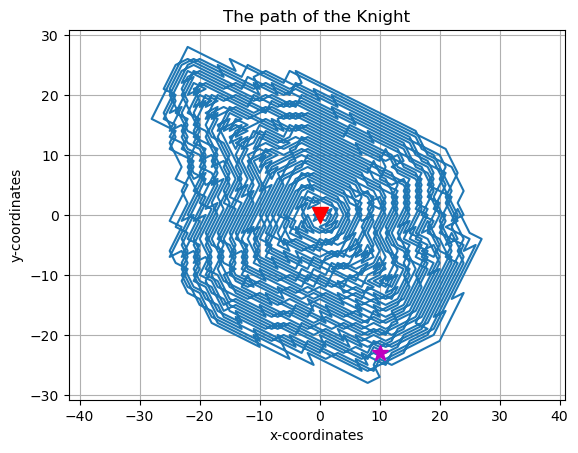

In [58]:
using PyPlot
plot(xs, ys)
plot(0,0, color = "r", marker="v",  markersize=12)
plot(xs[end], ys[end], color = "m", marker="*",  markersize=12)
title("The path of the Knight")
xlabel("x-coordinates")
ylabel("y-coordinates")
axis("equal")
grid(true)